**Gradient Boosting Ensemble basados ​​en histogramas:**

https://machinelearningmastery.com/histogram-based-gradient-boosting-ensembles/

El aumento de gradiente es un conjunto de algoritmos de árboles de decisión.

Puede ser una de las técnicas más populares para la clasificación estructurada (tabular) y los problemas de modelado predictivo de regresión dado que funciona muy bien en una amplia gama de conjuntos de datos en la práctica.

Un problema importante del aumento de gradiente es que es lento para entrenar el modelo. Esto es particularmente un problema cuando se usa el modelo en grandes conjuntos de datos con decenas de miles de ejemplos (filas).

El entrenamiento de los árboles que se agregan al conjunto se puede acelerar drásticamente al discretizar (agrupar) las variables de entrada continuas en unos pocos cientos de valores únicos. Los conjuntos de aumento de gradiente que implementan esta técnica y adaptan el algoritmo de entrenamiento en torno a las variables de entrada bajo esta transformación se denominan conjuntos de aumento de gradiente basados ​​en histogramas.

Aprenderemos lo siguiente:

Gradient boosting basada en histogramas es una técnica para entrenar árboles de decisión más rápidos que se utilizan en el ensemble de gradient boosting.

Cómo usar la implementación experimental del gradient  boosting basado en histogramas en la biblioteca scikit-learn.

Cómo usar Gradient Boosting Ensembles basados ​​en histogramas con las bibliotecas de terceros XGBoost y LightGBM.

In [ ]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


La documentación de scikit-learn afirma que estas implementaciones de aumento de gradiente basadas en histogramas son órdenes de magnitud más rápidas que la implementación de aumento de gradiente predeterminada proporcionada por la biblioteca.

HistGradientBoostingClassifier es una implementación de Gradient Boosting optimizada para conjuntos de datos grandes. La diferencia clave entre este clasificador y otros métodos de Gradient Boosting radica en cómo maneja los histogramas para mejorar la eficiencia computacional.

Estos estimadores basados ​​en histogramas pueden ser mucho más rápidos que GradientBoostingClassifier y GradientBoostingRegressor cuando el número de muestras es mayor que decenas de miles de muestras.

Las clases se pueden usar como cualquier otro modelo de scikit-learn.

De forma predeterminada, el conjunto utiliza 255 bins para cada función de entrada continua, y esto se puede configurar a través del argumento "max_bins". Establecer esto en valores más pequeños, como 50 o 100, puede dar como resultado más mejoras en la eficiencia, aunque quizás a costa de algunas habilidades del modelo.

El número de árboles se puede establecer a través del argumento "max_iter" y el valor predeterminado es 100.

Cuando se entrena un modelo de Gradient Boosting, en cada iteración se ajusta un árbol débil para corregir los errores del modelo existente. Tradicionalmente, se construyen árboles considerando todas las características y calculando las divisiones óptimas para cada característica. Sin embargo, este enfoque puede ser computacionalmente costoso, especialmente en conjuntos de datos grandes.

La versión "histogram-based" de Gradient Boosting, como la implementada en HistGradientBoostingClassifier, utiliza histogramas para reducir la complejidad computacional. En lugar de considerar todas las características y calcular divisiones precisas, este método agrupa los valores de las características en histogramas discretos. Luego, durante la construcción del árbol, se toman decisiones basadas en estos histogramas en lugar de realizar cálculos intensivos.

In [ ]:
# evaluate sklearn histogram gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
# define dataset
X, y = make_classification(n_samples=10000, n_features=100, n_informative=50, n_redundant=50, random_state=1)
# define the model
model = HistGradientBoostingClassifier(max_bins=255, max_iter=100)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.943 (0.007)


Ejecutar el ejemplo evalúa el rendimiento del modelo en el conjunto de datos sintéticos e informa la precisión de la clasificación de la media y la desviación estándar.

Nota: Nuestros resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Consideremos ejecutar el ejemplo varias veces y comparenos el resultado promedio.

En este caso, podemos ver que el algoritmo de aumento de gradiente de histograma de scikit-learn logra una precisión media de alrededor del 94,3 por ciento en el conjunto de datos sintéticos.

También podemos explorar el efecto del número de bins en el rendimiento del modelo.

El siguiente ejemplo evalúa el rendimiento del modelo con un número diferente de bins para cada característica de entrada continua de 50 a (aproximadamente) 250 en incrementos de 50.

El ejemplo completo se muestra a continuación.

>10 0.945 (0.009)
>50 0.944 (0.007)
>100 0.944 (0.008)
>150 0.944 (0.008)
>200 0.944 (0.007)
>255 0.943 (0.007)


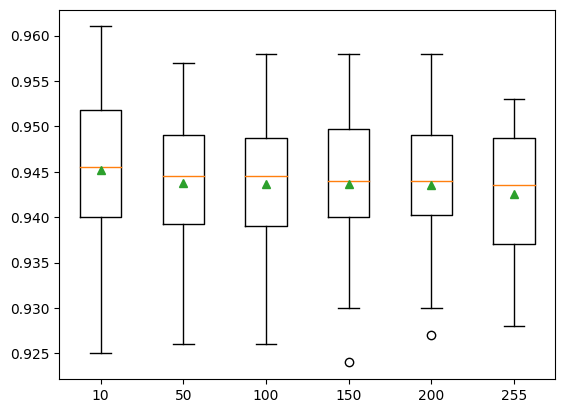

In [ ]:
# compare number of bins for sklearn histogram gradient boosting
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=10000, n_features=100, n_informative=50, n_redundant=50, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in [10, 50, 100, 150, 200, 255]:
		models[str(i)] = HistGradientBoostingClassifier(max_bins=i, max_iter=100)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the scores
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, X, y)
	# stores the results
	results.append(scores)
	names.append(name)
	# report performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Al ejecutar el ejemplo, se evalúa cada configuración, se informa la precisión de clasificación de la media y la desviación estándar a lo largo del camino y, finalmente, se crea un gráfico de la distribución de puntuaciones.

Nota: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y compare el resultado promedio.

En este caso, podemos ver que aumentar la cantidad de bins puede disminuir la precisión media del modelo en este conjunto de datos.

Podríamos esperar que un aumento en la cantidad de bins también requiera un aumento en la cantidad de árboles (max_iter) para garantizar que el modelo pueda explorar y aprovechar de manera efectiva los puntos de división adicionales.

Es importante destacar que ajustar un conjunto donde los árboles usan 10 o 50 bins por variable es mucho más rápido que 255 bins por variable de entrada.

>10 0,945 (0,009)
>50 0,944 (0,007)
>100 0,944 (0,008)
>150 0,944 (0,008)
>200 0,944 (0,007)
>255 0,943 (0,007)
Se crea una figura que compara la distribución de las puntuaciones de precisión para cada configuración mediante diagramas de caja y bigotes.

En este caso, podemos ver que aumentar el número de bins en el histograma parece reducir la dispersión de la distribución, aunque puede disminuir el rendimiento medio del modelo.

**Gradient Boosting de histograma con XGBoost:**

Extreme Gradient Boosting, o XGBoost para abreviar, es una biblioteca que proporciona una implementación altamente optimizada de aumento de gradiente.

Una de las técnicas implementadas en la biblioteca es el uso de histogramas para las variables de entrada continuas.

La biblioteca XGBoost se puede instalar usando su administrador de paquetes de Python favorito, como Pip;

Podemos desarrollar modelos XGBoost para usar con la biblioteca scikit-learn a través de las clases XGBClassifier y XGBRegressor.

El algoritmo de entrenamiento se puede configurar para usar el método de histograma configurando el argumento "tree_method" en 'aprox', y la cantidad de bins se puede configurar a través del argumento "max_bin".

modelo = XGBClassifier(tree_method='approx', max_bin=255, n_estimators=100)

El siguiente ejemplo demuestra la evaluación de un modelo XGBoost configurado para usar el histograma o la técnica aproximada para construir árboles con 255 bins por entidad de entrada continua y 100 árboles en el modelo.

In [ ]:
pip install xgboost

In [ ]:
# evaluate xgboost histogram gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# define dataset
X, y = make_classification(n_samples=10000, n_features=100, n_informative=50, n_redundant=50, random_state=1)
# define the model
model = XGBClassifier(tree_method='approx', max_bin=255, n_estimators=100)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.956 (0.007)


Ejecutar el ejemplo evalúa el rendimiento del modelo en el conjunto de datos sintéticos e informa la precisión de la clasificación de la media y la desviación estándar.

**Nota:** Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y compare el resultado promedio.

En este caso, podemos ver que el algoritmo de aumento de gradiente de histograma XGBoost logra una precisión media de alrededor del 95,7 por ciento en el conjunto de datos sintético.

Precisión: 0,957 (0,007)

**Gradient Boosting de histograma con LightGBM:**

Light Gradient Boosting Machine o LightGBM para abreviar es otra biblioteca de terceros como XGBoost que proporciona una implementación altamente optimizada de aumento de gradiente.

Es posible que haya implementado la técnica de histograma antes de XGBoost, pero XGBoost implementó más tarde la misma técnica, destacando la competencia de "eficiencia de aumento de gradiente" entre las bibliotecas de aumento de gradiente.

La biblioteca LightGBM se puede instalar utilizando su administrador de paquetes favorito de Python, como Pip; Por ejemplo:

In [ ]:
pip install lightgbm

Podemos desarrollar modelos LightGBM para usar con la biblioteca scikit-learn a través de las clases LGBMClassifier y LGBMRegressor.

El algoritmo de entrenamiento usa histogramas por defecto. Los bins máximos por variable de entrada continua se pueden establecer a través del argumento "max_bin".

modelo = LGBMClassifier(max_bin=255, n_estimators=100)

El siguiente ejemplo demuestra la evaluación de un modelo LightGBM configurado para usar el histograma o la técnica aproximada para construir árboles con 255 bins por entidad de entrada continua y 100 árboles en el modelo.

In [ ]:
# evaluate lightgbm histogram gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
# define dataset
X, y = make_classification(n_samples=10000, n_features=100, n_informative=50, n_redundant=50, random_state=1)
# define the model
model = LGBMClassifier(max_bin=255, n_estimators=100)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.943 (0.008)


Ejecutar el ejemplo evalúa el rendimiento del modelo en el conjunto de datos sintéticos e informa la precisión de la clasificación de la media y la desviación estándar.

**Nota:** Nuestos resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Consideremos ejecutar el ejemplo varias veces y comparemos el resultado promedio.

En este caso, podemos ver que el algoritmo de aumento de gradiente de histograma LightGBM logra una precisión media de alrededor del 94,2 por ciento en el conjunto de datos sintéticos.